<a href="https://colab.research.google.com/github/psyuktha/Tensorflow/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#data has already been sorted into training and test sets
(train_data, train_labels), (test_data, test_labels)  = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#show first training example
print(f"Training sample :\n{train_data[0]}\n")
print(f"Training label :\n{train_labels[0]}\n")


Training sample :
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
#create a small lst to index our training labels to make it human readable
class_names = ["T-shirt/top",	"Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)


10

In [ ]:
#normalisation means nos bw 0 and 1
train_data_norm = train_data/255
test_data_norm=test_data/255

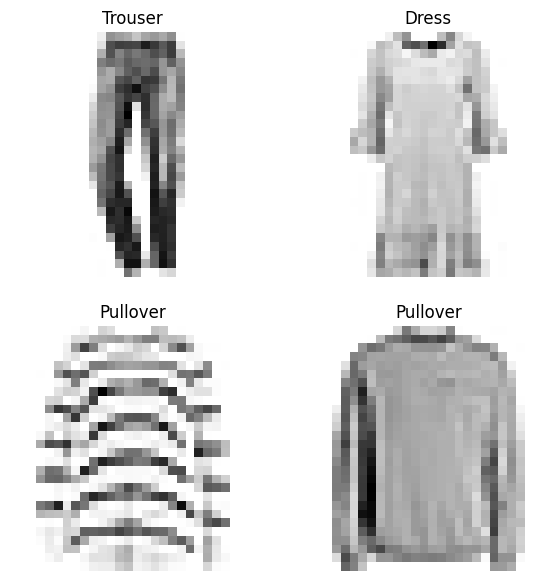

In [ ]:
#plot multiple random images of fashion mnist
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
tf.random.set_seed(42)
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")#10 different classes
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

norm_history = model_12.fit(train_data_norm,
                                train_labels,
                                epochs=20,
                                validation_data=(test_data_norm,test_labels))


Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3195 - accuracy: 0.5141 - val_loss: 0.8673 - val_accuracy: 0.7249
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7330 - accuracy: 0.7596 - val_loss: 0.6924 - val_accuracy: 0.7586
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6275 - accuracy: 0.7848 - val_loss: 0.6426 - val_accuracy: 0.7786
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5839 - accuracy: 0.7975 - val_loss: 0.5997 - val_accuracy: 0.7970
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5587 - accuracy: 0.8066 - val_loss: 0.5806 - val_accuracy: 0.8002
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5405 - accuracy: 0.8128 - val_loss: 0.5830 - val_accuracy: 0.8056
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5299 - accuracy: 0.8160 - val_loss: 0.6034 - val_accuracy:

In [ ]:
#predictions
y_probs=model_12.predict(test_data_norm)

y_probs[:5]

313/313 [==============================] - 1s 1ms/step


array([[3.1460161e-08, 1.2626407e-12, 2.4795079e-11, 4.9637194e-08,
        1.1922451e-08, 4.0094233e-01, 5.6398670e-07, 1.4918727e-01,
        1.1183332e-02, 4.3868622e-01],
       [7.3469477e-05, 5.0068044e-13, 8.9455897e-01, 2.3862681e-08,
        1.5967036e-02, 3.6934372e-19, 8.9398116e-02, 4.0141290e-35,
        2.5049721e-06, 0.0000000e+00],
       [1.5937387e-03, 9.8353279e-01, 2.3968481e-03, 5.4304805e-03,
        1.3292097e-03, 1.5964578e-03, 1.0997211e-03, 2.8906616e-03,
        1.1060866e-04, 1.9372153e-05],
       [8.7356038e-04, 9.8803502e-01, 2.3165895e-03, 3.0690776e-03,
        1.3236691e-03, 1.3021010e-03, 7.5841212e-04, 2.2491743e-03,
        6.5953413e-05, 6.4347892e-06],
       [1.1507455e-01, 9.5863797e-06, 1.7204392e-01, 1.1402640e-02,
        3.8048349e-02, 2.4568350e-10, 6.5907943e-01, 9.8754347e-17,
        4.3415832e-03, 2.1533902e-18]], dtype=float32)

In [ ]:
y_preds=y_probs.argmax(axis=1)
y_preds[10:15]


array([4, 5, 5, 3, 4])

In [ ]:
test_labels[10:15]

array([4, 5, 7, 3, 4], dtype=uint8)

In [ ]:
model_12.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


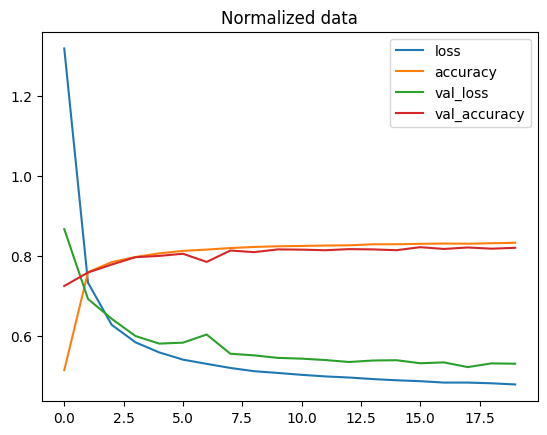

In [ ]:
import pandas as pd
pd.DataFrame(norm_history.history).plot(title="Normalized data");


In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None,  figsize=(10,10), text_size=15):
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)


array([[745,  13,  17,  79,   6,   3, 126,   0,  11,   0],
       [  0, 959,  10,  24,   5,   0,   1,   0,   1,   0],
       [ 16,   5, 680,  13, 175,   0, 105,   0,   6,   0],
       [ 37,  26,  14, 821,  45,   1,  49,   1,   6,   0],
       [  1,   2,  90,  23, 788,   0,  90,   0,   6,   0],
       [  0,   0,   0,   1,   0, 911,   0,  46,  10,  32],
       [135,  10, 112,  57, 125,   3, 547,   0,  11,   0],
       [  0,   0,   0,   0,   0,  57,   0, 926,   0,  17],
       [  5,   1,   2,   6,   3,   8,  40,   6, 929,   0],
       [  0,   0,   0,   0,   0,  27,   0,  73,   1, 899]])

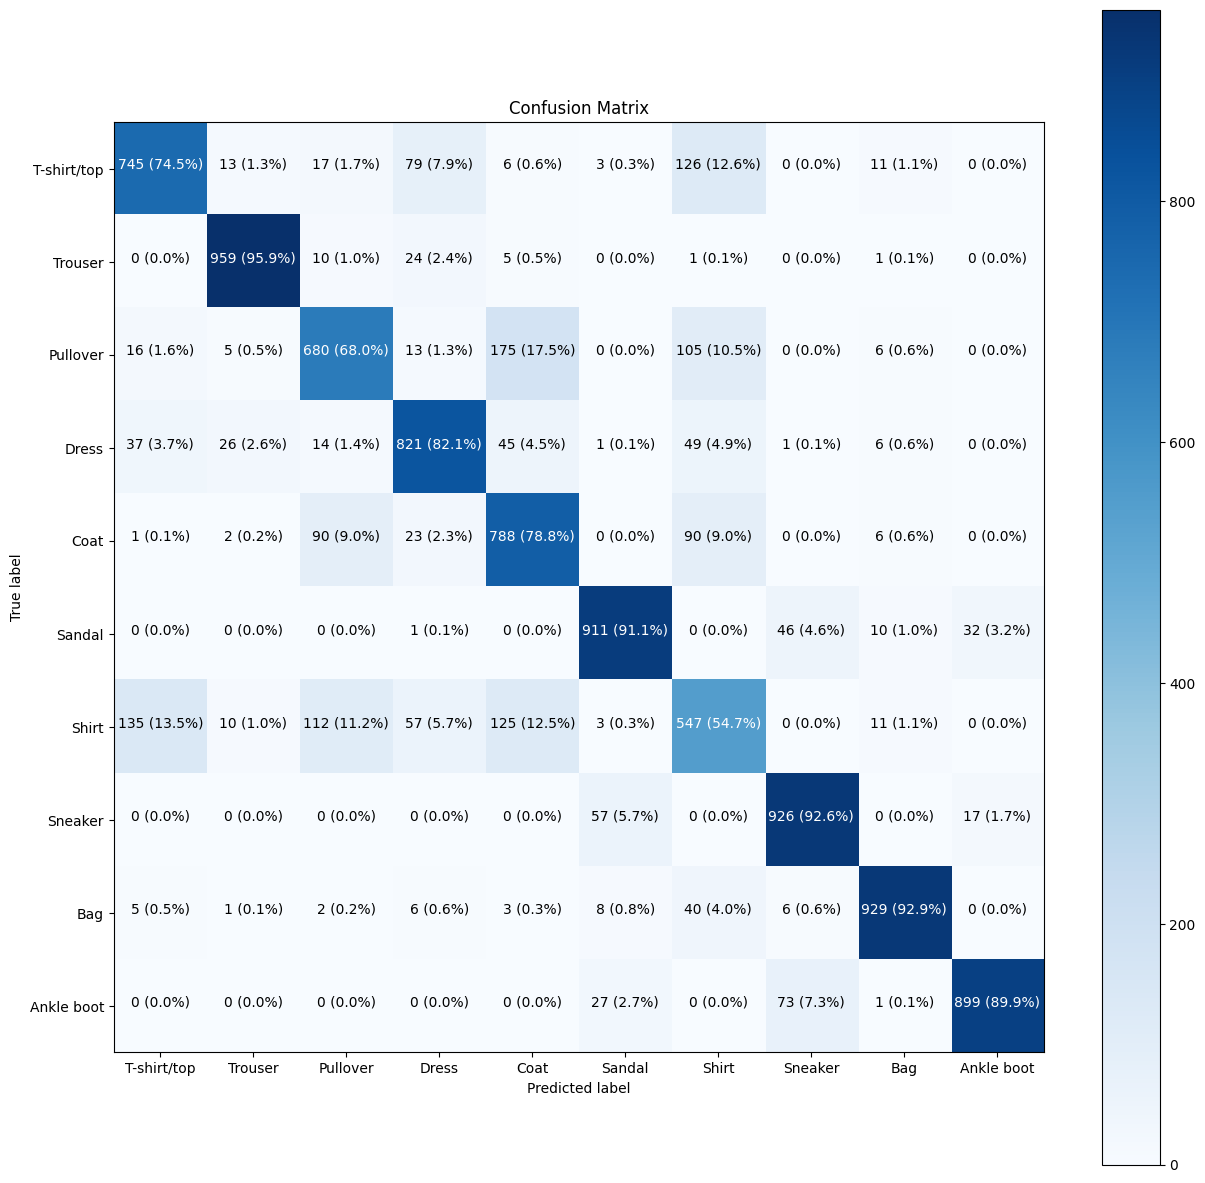

In [ ]:

import numpy as np
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):


  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 20ms/step


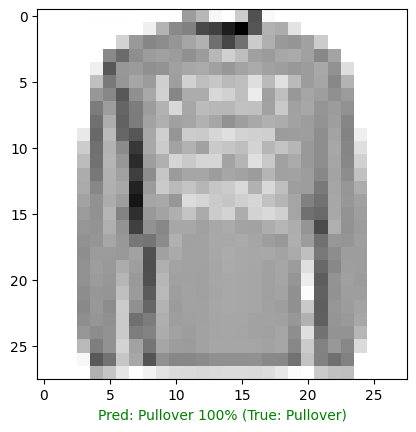

In [ ]:
plot_random_image(model=model_12,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)